<a href="https://colab.research.google.com/github/wander-asb/Customer_Segmentation/blob/main/Seg_consumers_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Funções 

In [1]:
def model_plot_results(dataframe, range_n_clusters):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(dataframe) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
      cluster_labels = clusterer.fit_predict(dataframe)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(dataframe, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(dataframe, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          dataframe[:, 0], dataframe[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
         c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

      plt.show()

## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


from google.colab                import drive
import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_segmentacao = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Segmentação de Clientes/online_retail_II.xlsx')
df_segmentacao.shape

(525461, 8)

In [5]:
df_segmentacao.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df_segmentacao.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [7]:
df_segmentacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Tratamento de dados

In [8]:
#Retiramos dados nulos de consumidores
df_segmentacao = df_segmentacao[~df_segmentacao['Customer ID'].isna()].drop('Description', axis=1)

In [9]:
#Verificamos que existem quantidades negativas de compras
df_segmentacao = df_segmentacao[~df_segmentacao['Quantity'] < 0]

In [10]:
#Intervalo de tempo da base de dados
df_segmentacao['InvoiceDate'].agg(['min', 'max'])

#A data máxima será a medida final do intervalo de recencia
data_máxima = max(df_segmentacao['InvoiceDate'])

In [11]:
#Excluir linhas com comportamento de quantidade de compra negativa, pode ser estorno
df_segmentacao = df_segmentacao[~df_segmentacao['Quantity'] < 0]

In [12]:
data_máxima

Timestamp('2010-12-09 20:01:00')

In [13]:
df_segmentacao['Customer ID'] = df_segmentacao['Customer ID'].astype(int).astype(str)
df_segmentacao.shape

(407695, 7)

In [14]:
#Quantidade de clientes únicos pertencentes a base de dados
len(df_segmentacao['Customer ID'].unique().tolist())

4314

In [15]:
df_segmentacao.dtypes

Invoice                object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [16]:
#Criar análise de RFM para a base de clientes
df_segmentacao['Amount'] = df_segmentacao['Price'] * df_segmentacao['Quantity']

## RFM Analytcs

### Montante 

In [17]:
#Cria feature de montante transacionado
df_monetary = df_segmentacao.groupby('Customer ID')['Amount'].sum().reset_index().rename({'Amount':'Montante'}, axis = 1)

### Frequencia

In [18]:
#Cria feature de invoice consumida
df_frequency = df_segmentacao.groupby('Customer ID')['Invoice'].count().reset_index().rename({'Invoice':'Frequencia'}, axis = 1)

In [19]:
#Junta as features criadas logo acima
df = df_monetary.merge(df_frequency, on='Customer ID')

### Recencia

In [20]:
#Trazer feature de recência de cada consumidor
df_segmentacao['Recencia'] = data_máxima - df_segmentacao['InvoiceDate']

#Buscamos a data mínima em dias de cada cliente
df_recency = df_segmentacao.groupby('Customer ID')['Recencia'].min().reset_index()

#Tratamos a data
df_recency['Recencia'] = df_recency['Recencia'].dt.days

#Junta as features tratadas
df = df.merge(df_recency, on='Customer ID')

### Elasticidade

In [21]:
#Buscamos a data em dias da última compra do cliente
data_ultima_compra = df_segmentacao.groupby('Customer ID')['InvoiceDate'].max().reset_index()

#Renomeamos a coluna de InvoiceDate para "Data ultima compra"
data_ultima_compra = data_ultima_compra.rename(columns={'InvoiceDate':'Data ultima compra'})

In [22]:
#Buscamos a data em dias da primeira compra do cliente
data_primeira_compra = df_segmentacao.groupby('Customer ID')['InvoiceDate'].min().reset_index()

#Renomeamos a coluna de InvoiceDate para "Data ultima compra"
data_primeira_compra = data_primeira_compra.rename(columns={'InvoiceDate':'Data primeira compra'})

In [23]:
elasticidade = data_ultima_compra.merge(data_primeira_compra, on='Customer ID', how='left')

In [24]:
#Calculamos a feature de comprimento (elasticidade)
elasticidade['Elasticidade'] = elasticidade['Data ultima compra'] - elasticidade['Data primeira compra']

In [25]:
#Tratamos a data
elasticidade['Elasticidade'] = elasticidade['Elasticidade'].dt.days

In [26]:
#Junta as features tratadas
df = df.merge(elasticidade[['Customer ID','Elasticidade']], on='Customer ID')

## Remoção de outliers

#Remoção de outliers RFM

In [27]:
rfm_dataframe = df[['Customer ID','Montante','Recencia','Frequencia']]

# Remoção de outliers
Q1 = rfm_dataframe.Montante.quantile(0.05)
Q3 = rfm_dataframe.Montante.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Montante >= Q1 - 1.5*IQR) & (rfm_dataframe.Montante <= Q3 + 1.5*IQR)].copy()

Q1 = rfm_dataframe.Recencia.quantile(0.05)
Q3 = rfm_dataframe.Recencia.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Recencia >= Q1 - 1.5*IQR) & (rfm_dataframe.Recencia <= Q3 + 1.5*IQR)].copy()

Q1 = rfm_dataframe.Frequencia.quantile(0.05)
Q3 = rfm_dataframe.Frequencia.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Frequencia >= Q1 - 1.5*IQR) & (rfm_dataframe.Frequencia <= Q3 + 1.5*IQR)].copy()

In [30]:
rfm_dataframe.shape

(4231, 4)

#Remoção de outliers RFME

In [31]:
rfme_dataframe = df[['Customer ID','Recencia','Frequencia','Montante','Elasticidade']]
rfme_dataframe.head()

,Customer ID,Recencia,Frequencia,Montante,Elasticidade
0,12346,164,33,372.86,196
1,12347,2,71,1323.32,37
2,12348,73,20,222.16,0
3,12349,42,102,2671.14,181
4,12351,10,21,300.93,0


In [32]:
# Remoção de outliers - Feature Montante
Q1 = rfme_dataframe.Montante.quantile(0.05)
Q3 = rfme_dataframe.Montante.quantile(0.95)
IQR = Q3 - Q1
rfme_dataframe = rfme_dataframe[(rfme_dataframe.Montante >= Q1 - 1.5*IQR) & (rfme_dataframe.Montante <= Q3 + 1.5*IQR)].copy()

In [33]:
# Remoção de outliers - Feature Recencia
Q1 = rfme_dataframe.Recencia.quantile(0.05)
Q3 = rfme_dataframe.Recencia.quantile(0.95)
IQR = Q3 - Q1
rfme_dataframe = rfme_dataframe[(rfme_dataframe.Recencia >= Q1 - 1.5*IQR) & (rfme_dataframe.Recencia <= Q3 + 1.5*IQR)].copy()

In [34]:
# Remoção de outliers - Feature Frequencia
Q1 = rfme_dataframe.Frequencia.quantile(0.05)
Q3 = rfme_dataframe.Frequencia.quantile(0.95)
IQR = Q3 - Q1
rfme_dataframe = rfme_dataframe[(rfme_dataframe.Frequencia >= Q1 - 1.5*IQR) & (rfme_dataframe.Frequencia <= Q3 + 1.5*IQR)].copy()

In [35]:
# Remoção de outliers - Feature Elasticidade
Q1 = rfme_dataframe.Elasticidade.quantile(0.05)
Q3 = rfme_dataframe.Elasticidade.quantile(0.95)
IQR = Q3 - Q1
rfme_dataframe = rfme_dataframe[(rfme_dataframe.Elasticidade >= Q1 - 1.5*IQR) & (rfme_dataframe.Elasticidade <= Q3 + 1.5*IQR)].copy()

In [36]:
rfme_dataframe.shape

(4231, 5)

In [37]:
len(rfme_dataframe['Customer ID'].unique().tolist()), len(rfm_dataframe['Customer ID'].unique().tolist())

(4231, 4231)

# Normalização de dados

In [38]:
#Normalização de dados
normalizacao = StandardScaler()

rfm = rfm_dataframe[['Montante','Recencia','Frequencia']]

rfme = rfme_dataframe[['Montante','Recencia','Frequencia','Elasticidade']]

#Normalização com os dados no default
rfm = normalizacao.fit_transform(rfm)

#Normalização com a feature de elasticidade
rfme = normalizacao.fit_transform(rfme)

# RFM

### Ellow Method RFM

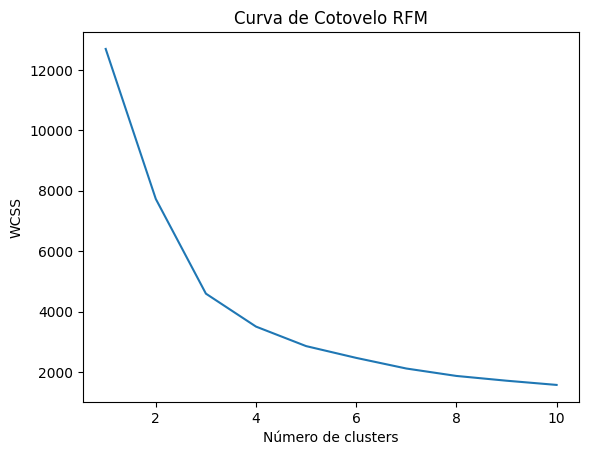

In [39]:
# Armazena o valor de WCSS para cada valor de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)

# Plota a curva de cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo RFM')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
def ellow(df, range_n_clusters):
    result = {}
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        result[n_clusters] = {"labels": cluster_labels, "score": silhouette_avg}
    return result

range_n_clusters = [2, 3, 4, 5, 6]

ellow(rfm, range_n_clusters)

{2: {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'score': 0.5205436037138311},
 3: {'labels': array([1, 0, 0, ..., 1, 0, 0], dtype=int32),
  'score': 0.5023453929205351},
 4: {'labels': array([1, 0, 0, ..., 1, 0, 3], dtype=int32),
  'score': 0.48161309692744053},
 5: {'labels': array([1, 0, 0, ..., 4, 1, 0], dtype=int32),
  'score': 0.4148618168595587},
 6: {'labels': array([1, 0, 0, ..., 4, 1, 3], dtype=int32),
  'score': 0.42015106164272625}}

For n_clusters = 2 The average silhouette_score is : 0.5205436037138311


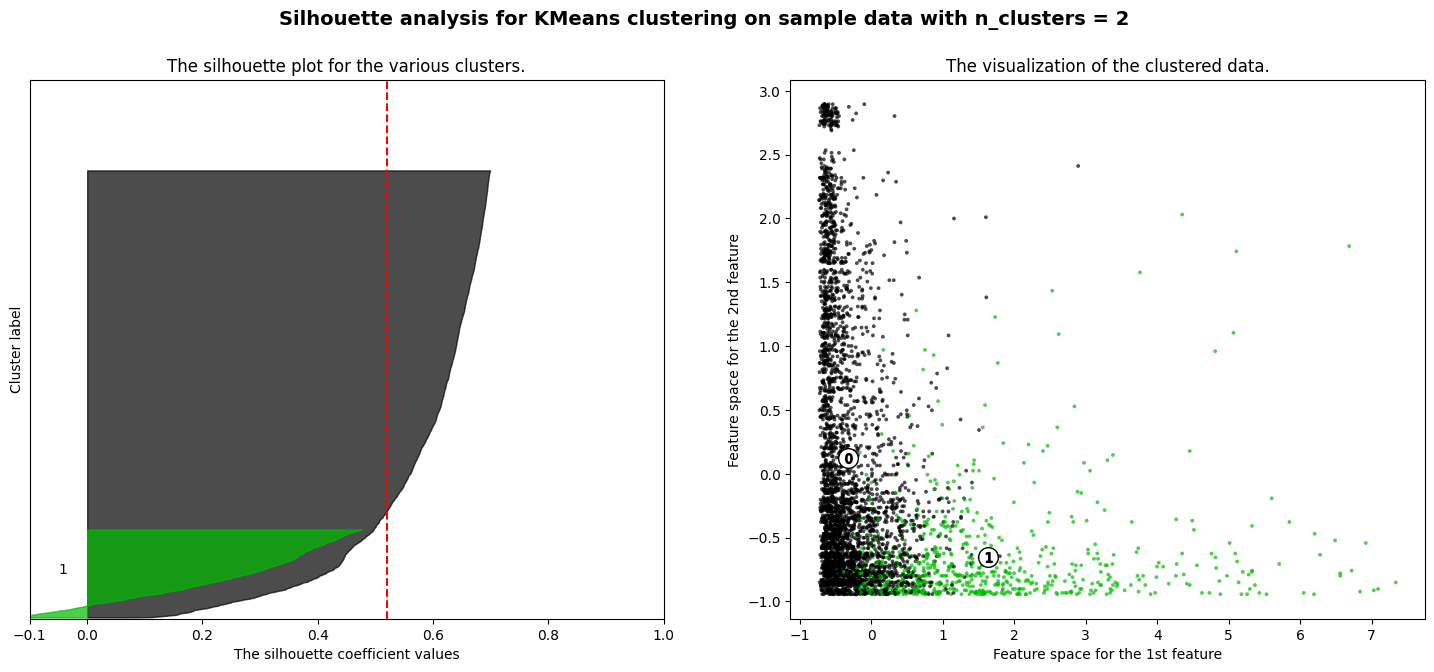

For n_clusters = 3 The average silhouette_score is : 0.5023453929205351


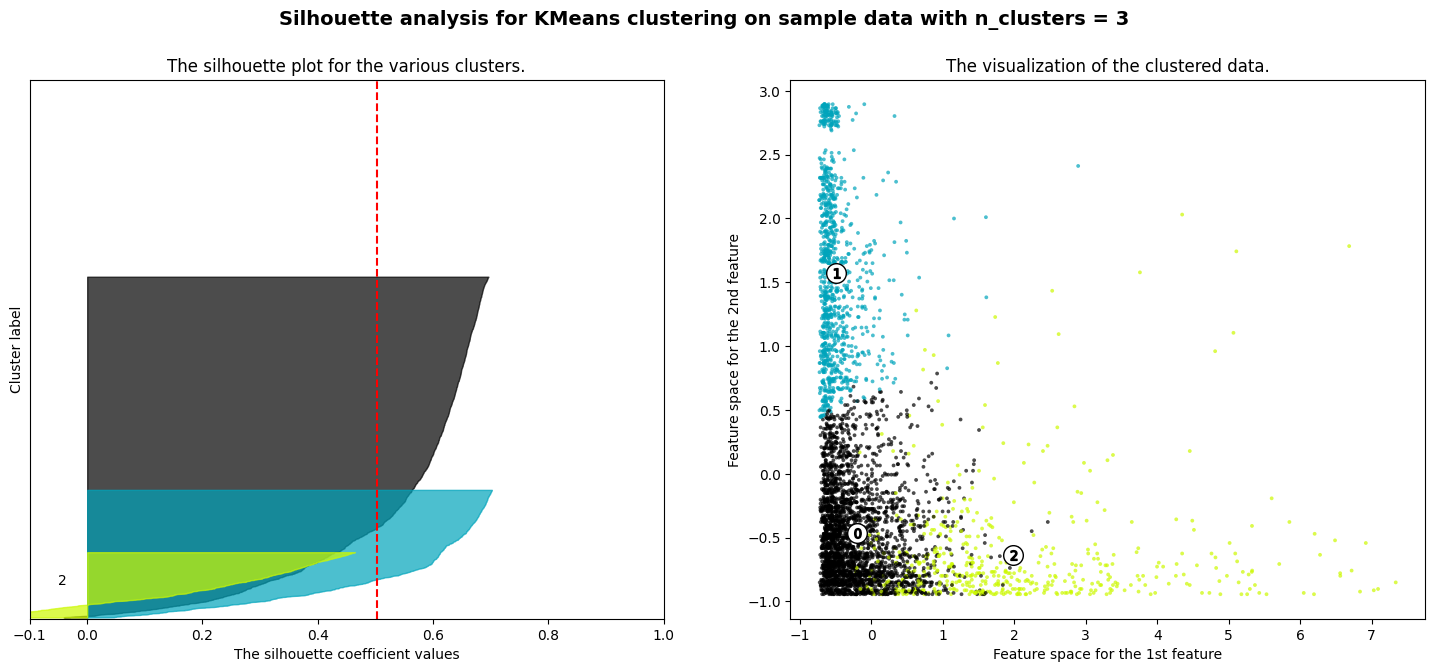

For n_clusters = 4 The average silhouette_score is : 0.48161309692744053


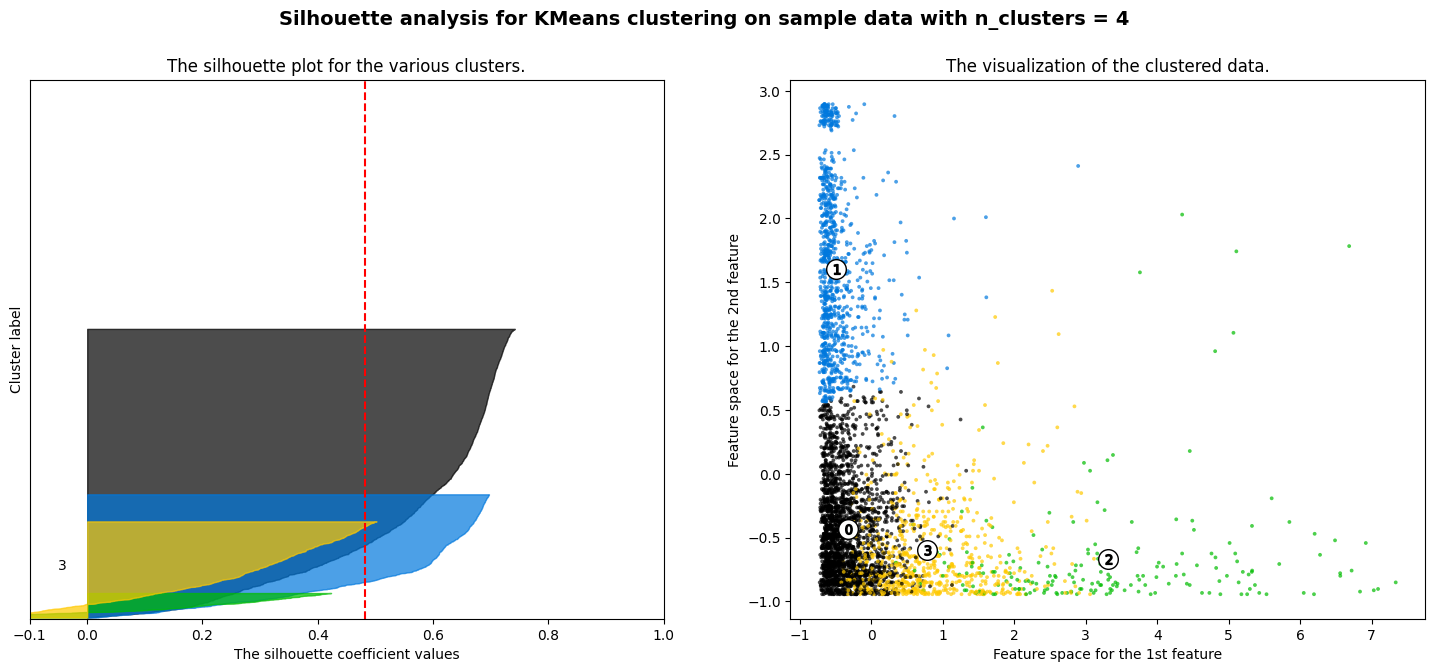

For n_clusters = 5 The average silhouette_score is : 0.4148618168595587


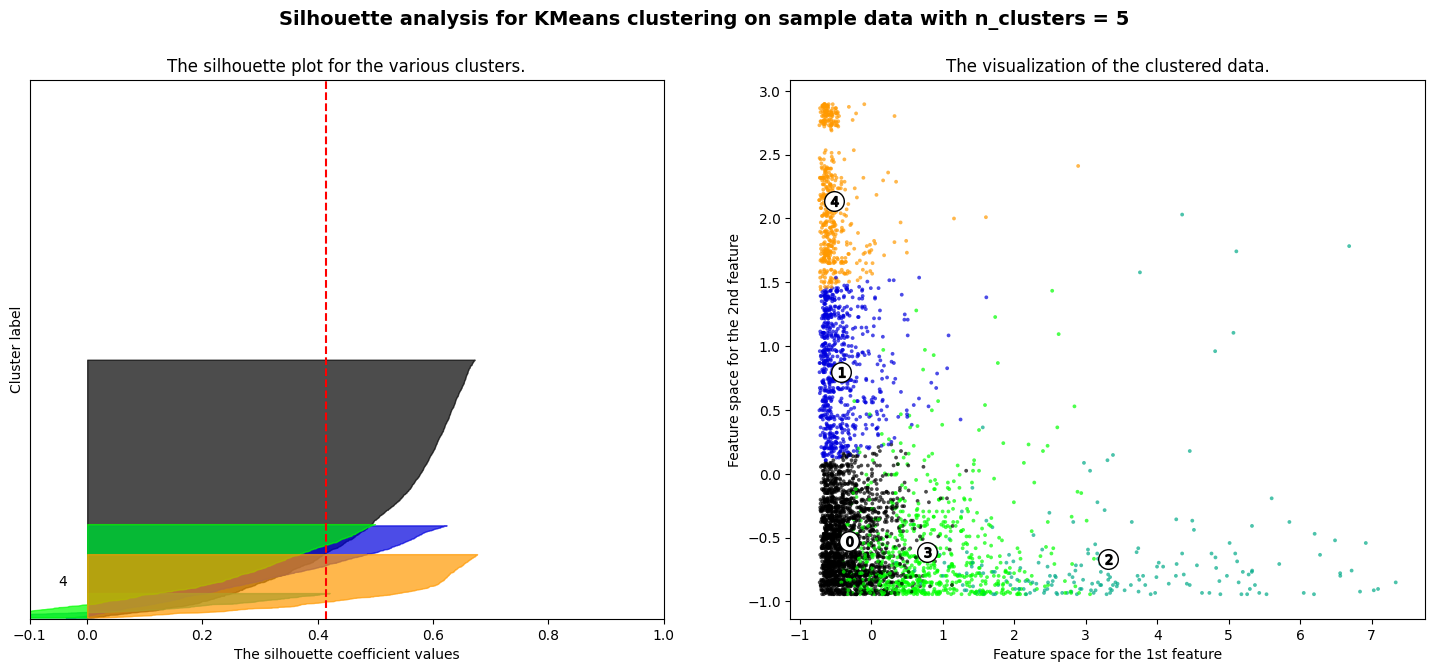

For n_clusters = 6 The average silhouette_score is : 0.42015106164272625


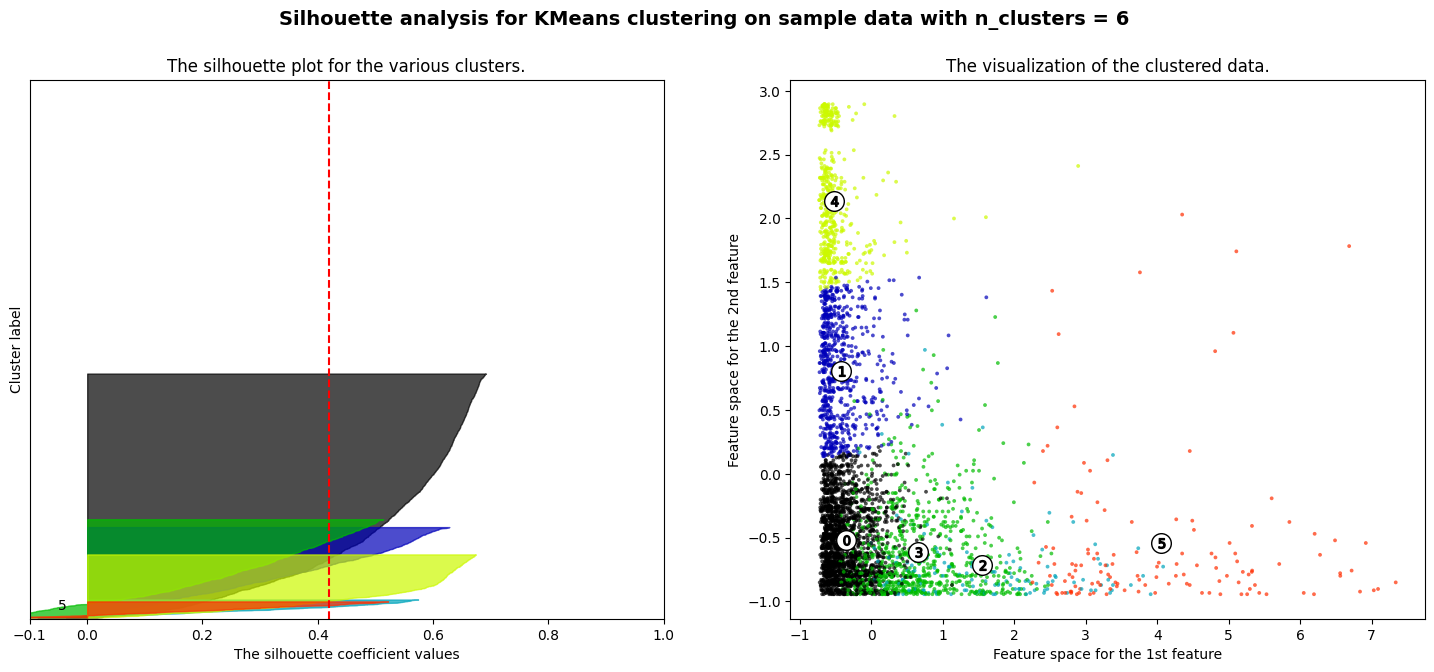

In [41]:
model_plot_results(rfm, range_n_clusters)

In [42]:
model = KMeans(n_clusters = 3, random_state=42, init='k-means++')
cluster_labels = model.fit_predict(rfm)

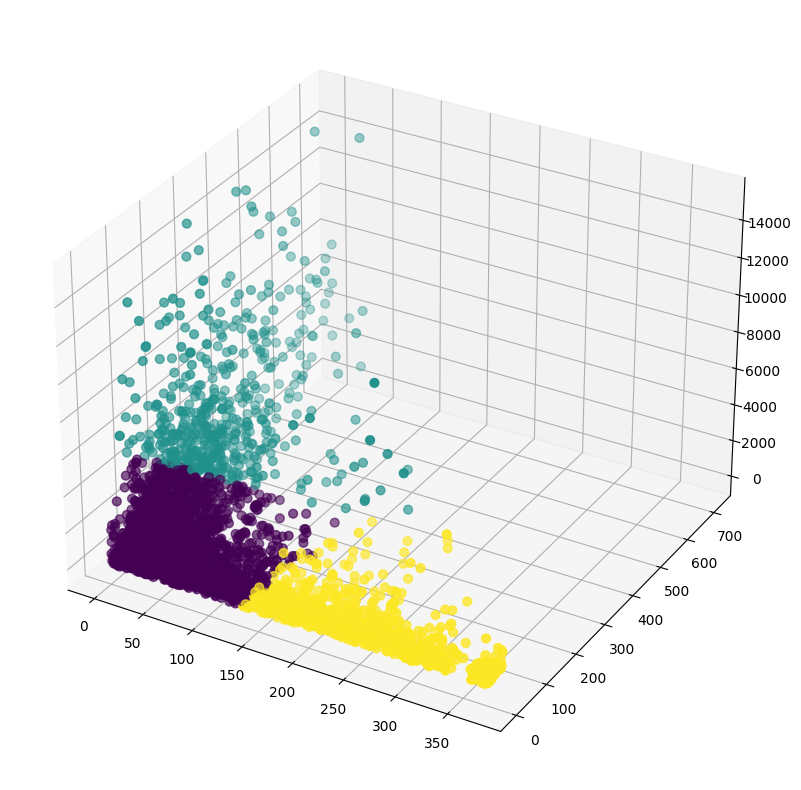

In [43]:
rfm_dataframe['Segmentacao'] = cluster_labels + 1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_dataframe['Recencia'])
y = np.array(rfm_dataframe['Frequencia'])
z = np.array(rfm_dataframe['Montante'])

ax.scatter(x, y, z, c=rfm_dataframe["Segmentacao"], s=40)

plt.show()

### Visualização de dados

In [44]:
rfm_dataframe.head()

,Customer ID,Montante,Recencia,Frequencia,Segmentacao
0,12346,372.86,164,33,3
1,12347,1323.32,2,71,1
2,12348,222.16,73,20,1
3,12349,2671.14,42,102,1
4,12351,300.93,10,21,1


In [45]:
rfm_dataframe.describe()

,Montante,Recencia,Frequencia,Segmentacao
count,4231.000000,4231.000000,4231.000000,4231.000000
mean,1368.562468,91.660837,79.100685,1.599385
std,1877.267461,97.194650,100.342601,0.847742
min,0.000000,0.000000,1.000000,1.000000
25%,304.665000,18.000000,18.000000,1.000000
50%,678.200000,53.000000,43.000000,1.000000
75%,1631.560000,137.000000,98.000000,2.000000
max,15139.350000,373.000000,712.000000,3.000000


# RFME

### Ellow method RFME

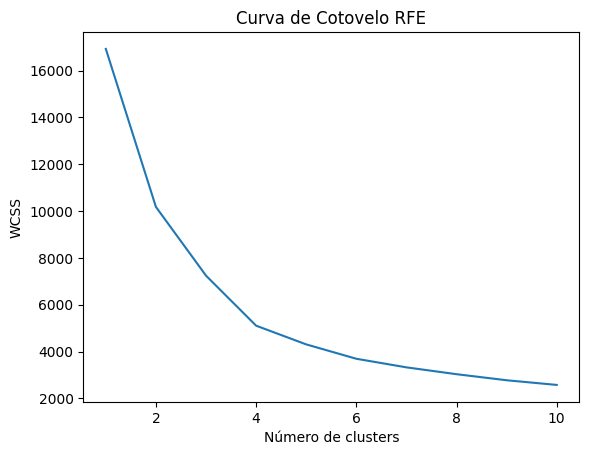

In [46]:
# Armazena o valor de WCSS para cada valor de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfme)
    wcss.append(kmeans.inertia_)

# Plota a curva de cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo RFE')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
def ellow(df, range_n_clusters):
    result = {}
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        result[n_clusters] = {"labels": cluster_labels, "score": silhouette_avg}
    return result

range_n_clusters = [2, 3, 4, 5, 6]

ellow(rfme, range_n_clusters)

{2: {'labels': array([0, 0, 0, ..., 0, 1, 1], dtype=int32),
  'score': 0.3990350425370056},
 3: {'labels': array([0, 2, 0, ..., 0, 2, 2], dtype=int32),
  'score': 0.3685423872055454},
 4: {'labels': array([3, 0, 0, ..., 3, 2, 2], dtype=int32),
  'score': 0.4131382153480577},
 5: {'labels': array([2, 0, 0, ..., 3, 2, 2], dtype=int32),
  'score': 0.4155739974979986},
 6: {'labels': array([2, 0, 0, ..., 3, 2, 2], dtype=int32),
  'score': 0.40925719039673014}}

For n_clusters = 2 The average silhouette_score is : 0.3990350425370056


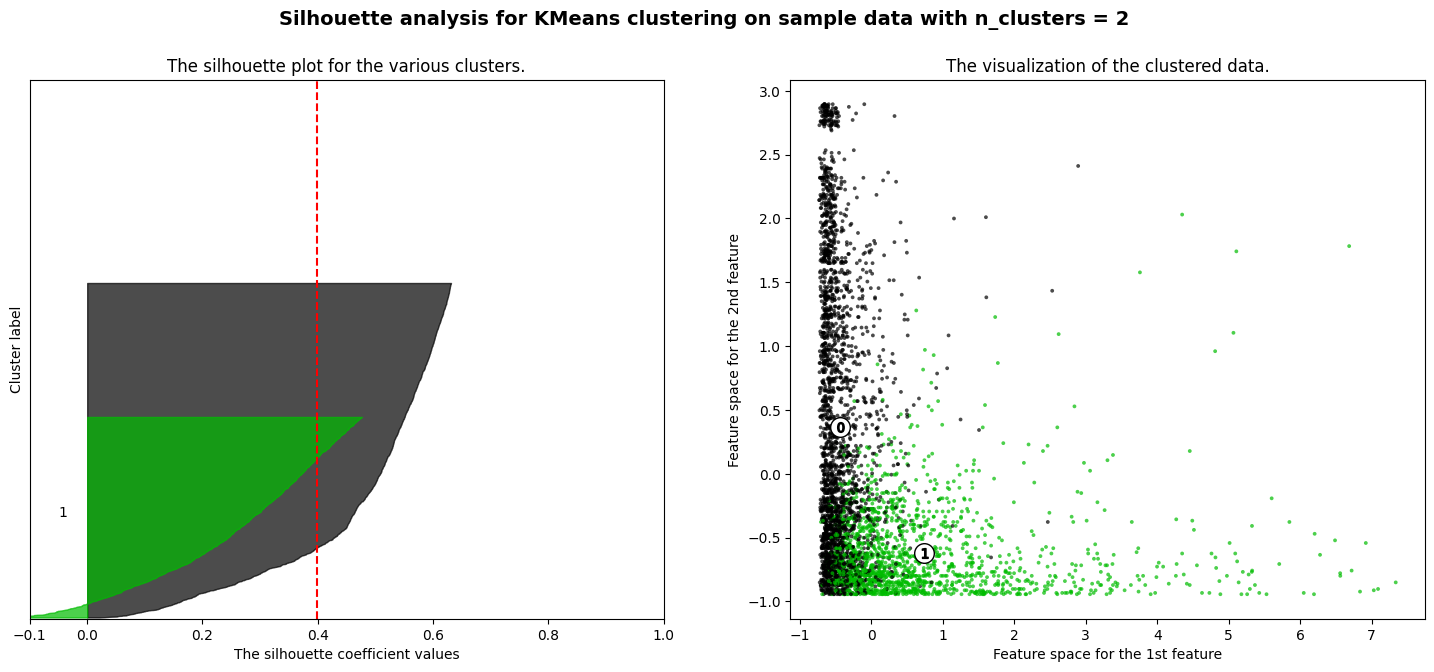

For n_clusters = 3 The average silhouette_score is : 0.3685423872055454


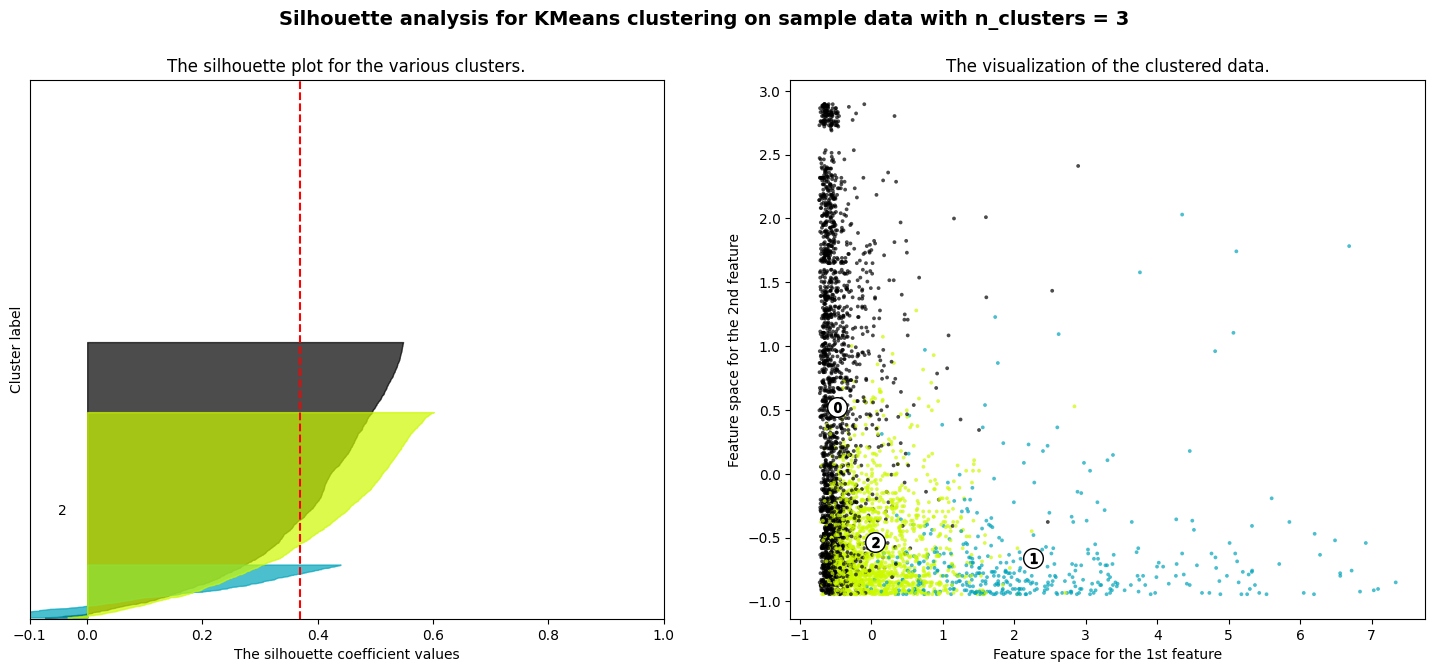

For n_clusters = 4 The average silhouette_score is : 0.4131382153480577


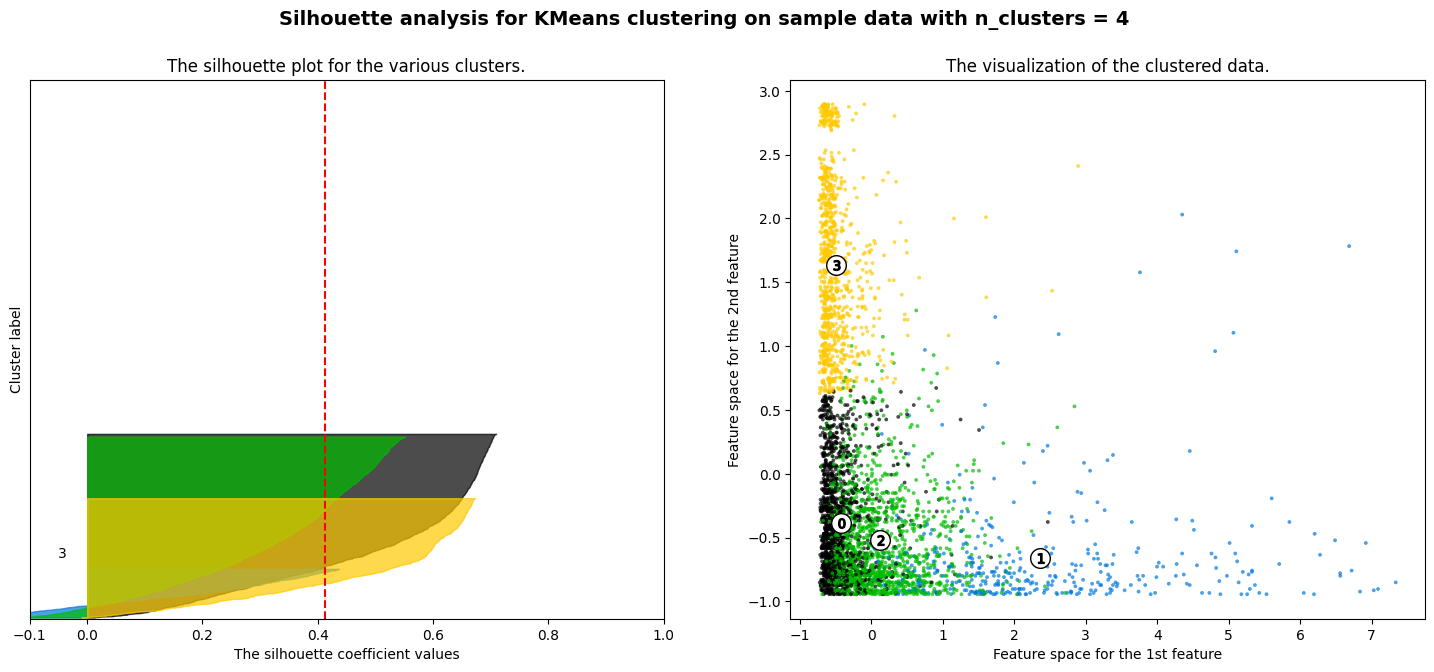

For n_clusters = 5 The average silhouette_score is : 0.4155739974979986


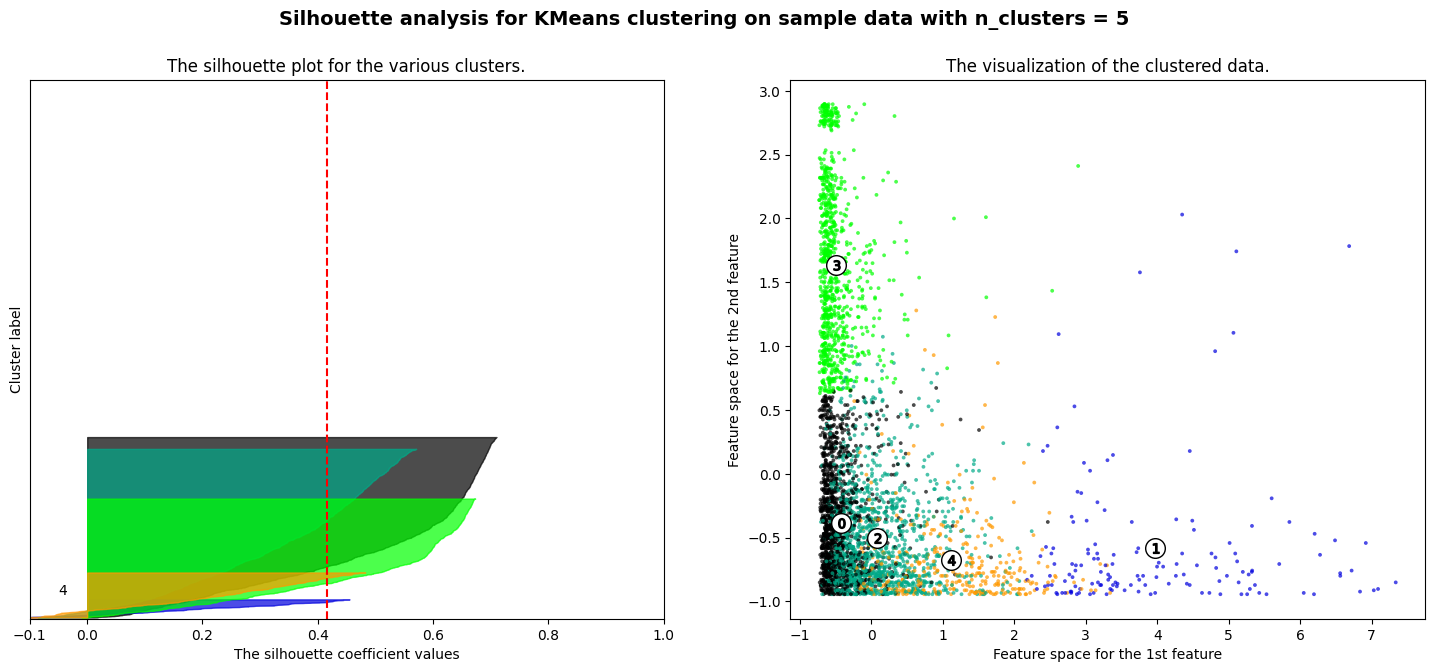

For n_clusters = 6 The average silhouette_score is : 0.40925719039673014


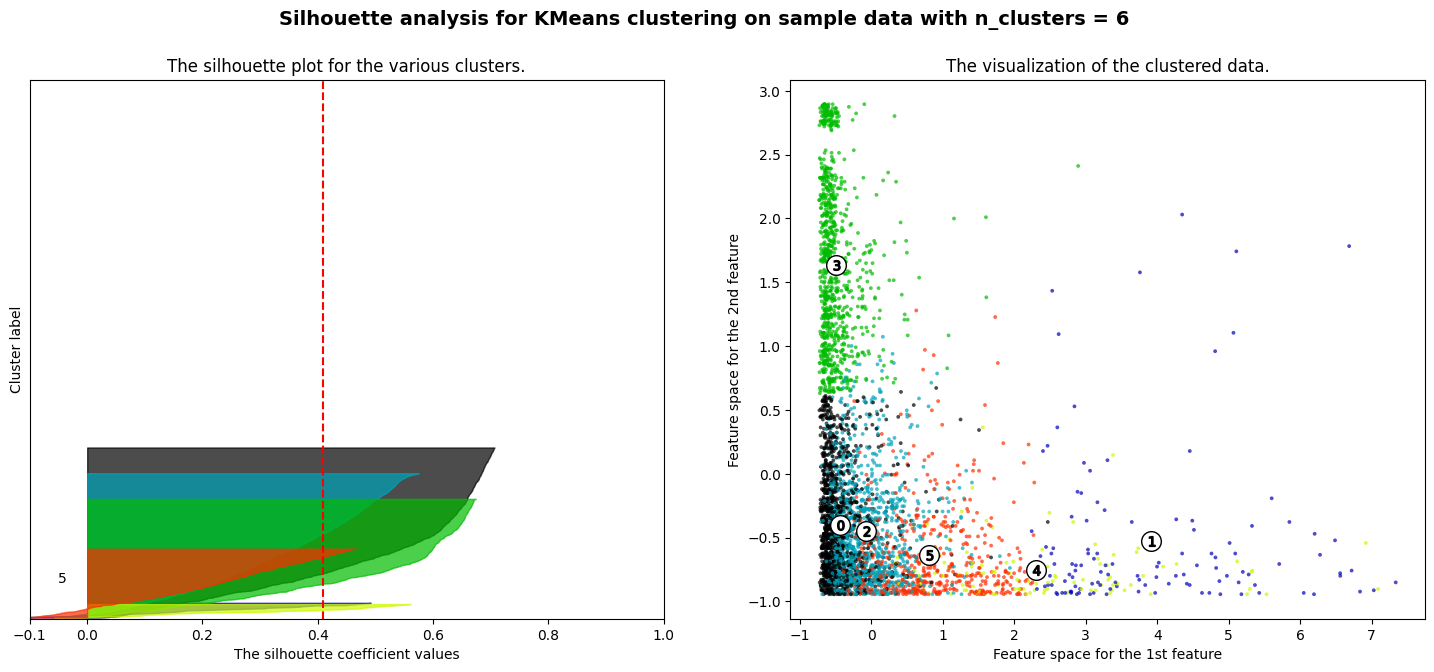

In [48]:
model_plot_results(rfme, range_n_clusters)